In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [86]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=7)

In [87]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


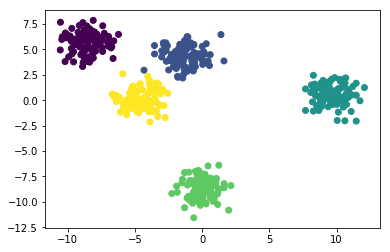

In [88]:
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [89]:
k=5
color=["green","red","blue","yellow","orange"]

In [90]:
clusters=[]


In [91]:
for i in range(k):
    centers=10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    cluster={
        'center':centers,
        'points':points,
        'color':color[i],
    }
#     print("value of i=",i)
#     clusters[i]=cluster
    clusters.append(cluster)

In [92]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [93]:
def assignPointToClusters(clusters):
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]
        
        for kx in range(k):
#             print(curr_x)
#             print()
            d=distance(curr_x,clusters[kx]["center"])
            dist.append(d)
        
        current_cluster=np.argmin(dist)
        clusters[current_cluster]["points"].append(curr_x)

In [94]:
def plotCluster(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]["points"])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]["color"])
        except: pass
        
        uk=clusters[kx]["center"]
        plt.scatter(uk[0],uk[1],color="black",marker='*')

In [95]:
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]["points"])
        
        if(pts.shape[0]>0):
            new_u=pts.mean(axis=0)
            clusters[kx]["center"]=new_u
            clusters[kx]["points"]=[]

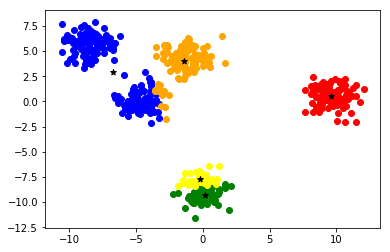

In [102]:
assignPointToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)